## import

In [1]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


## initialization
pix
x0                      y [0 - 255]
x1
x2
x3
x4
x5
x6
x7


<!-- 
red:
x1 x2 x3
x4 y  x5
x6 x7 x8 
-->

In [2]:
# variables
features = 8
y = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,[None,features])
w = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros(1))

# functions
pred = tf.matmul(x, w) + b 
loss = tf.reduce_mean(tf.pow(pred - y, 2))
alfa = 0.000004
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

## data function

In [3]:
def get_XY_from_image(photo_name:str,color:int,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])}")
    for i in range(1,len(color_arr)-1):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    # data_x = np.array(data_x)
    # data_y = np.array(data_y)
    return (data_x,data_y)

## get data

In [4]:
data_x , data_y = get_XY_from_image("data/balloon.jpg",0)
data_t_x , data_t_y = get_XY_from_image("data/cat.jpg",0)
data_x = np.append(data_x,data_t_x,axis=0)
data_y = np.append(data_y,data_t_y,axis=0)
data_x = np.array(data_x)
data_y = np.array(data_y)
data_t_x , data_t_y = get_XY_from_image("data/cat_test.jpg",0)
data_t_x = np.array(data_t_x)
data_t_y = np.array(data_t_y)


pic size: 480x720
pic size: 576x1024
pic size: 681x1024


## running the sim

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,10000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              if(i%(show*10)==0):
                     print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))
              #  w = {sess.run(w)}, b = {sess.run(b)},


i = 200, loss = 140.99893188476562
i = 300, loss = 129.9231414794922
i = 400, loss = 120.43297576904297
i = 500, loss = 112.30065155029297
i = 600, loss = 105.33131408691406
i = 700, loss = 99.35828399658203
i = 800, loss = 94.23894500732422
i = 900, loss = 89.85116577148438
i = 1000, loss = 86.09025573730469
i = 1100, loss = 82.86669158935547
i = 1200, loss = 80.10360717773438
i = 1300, loss = 77.73521423339844
i = 1400, loss = 75.70512390136719
i = 1500, loss = 73.96499633789062
i = 1600, loss = 72.4734115600586
i = 1700, loss = 71.19486236572266
i = 1800, loss = 70.09892272949219
i = 1900, loss = 69.15953063964844
i = 2000, loss = 68.35428619384766
i = 2100, loss = 67.66405487060547
i = 2200, loss = 67.07240295410156
i = 2300, loss = 66.56526184082031
i = 2400, loss = 66.13053894042969
i = 2500, loss = 65.75790405273438
i = 2600, loss = 65.43848419189453
i = 2700, loss = 65.16468811035156
i = 2800, loss = 64.93000030517578
i = 2900, loss = 64.72882080078125
i = 3000, loss = 64.55637

## printing and testing

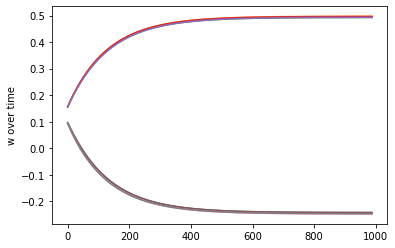

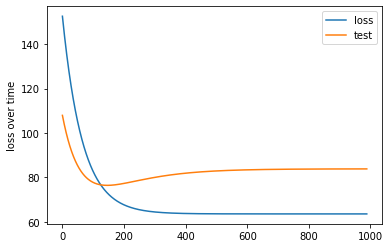

In [6]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

# data_x , data_y = get_XY_from_image("cat.jpg",0)

# print(f"loss test: {sess.run(loss,feed_dict={x:data_x,y:data_y})}")

# print(f"w = {sess.run(w)}")
# print(f"b = {sess.run(b)} ")
# print(f"predict = {np.matmul([5,15,10],sess.run(w))+sess.run(b)}")